# 1. Install and Import Library

In [1]:
!pip install wget
!pip install opendatasets

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2cd22c6f23ec49072ebe150223f58c928fff4b0d4ef9a6f512ade93cba8a3873
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import opendatasets
import wget
import zipfile
from tqdm import tqdm
import os

# 2. Load Dataset from Kaggle

In [4]:
if os.path.exists('diabetes-dataset/diabetes.csv'):
  print("file sudah ada")
else:
  opendatasets.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset', data_dir='')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hilmiyatulasna
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset


100%|██████████| 8.91k/8.91k [00:00<00:00, 2.96MB/s]

In [5]:
data = pd.read_csv("diabetes-dataset/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.shape

(768, 9)

# 3. Data Understanding

Informasi data:

Attribute  | Keterangan
------------- | -------------
Sumber | https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
Pregnancies | merepresentasikan Jumlah kehamilan
Glucose | merepresentasikan  tingkat Glukosa dalam darah
BloodPressure | merepresentasikan pengukuran tekanan darah
SkinThickness | merepresentasikan ketebalan kulit
Insulin | merepresentasikan tingkat Insulin dalam darah       
BMI | merepresentasikan indeks massa tubuh
DiabetesPedigreeFunction  | merepresentasikan persentase diabetes
Age |merepresentasikan umur
Outcome |merepresentasikan hasil akhir 1 adalah diabetes dan 0 adalah Tidak diabetes

## 3.1 Checking variable types in data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3.2 See the amount of data

In [8]:
print("Jumlah baris          :", data.shape[0])
print("Jumlah kolom          :", data.shape[1])

Jumlah baris          : 768
Jumlah kolom          : 9


## 3.2 Check missing values

In [9]:
pd.DataFrame({
    'missing value':data.isnull().sum()
})

,missing value
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 3.4 Check double duplicated data

In [10]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## 3.5 Statistical description of data

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fungsi describe() memberikan informasi statistik untuk setiap kolom, yang mencakup:
*   **Count**: jumlah sampel dalam data.
*   **Mean**: nilai rata-rata.
*   **Std**: standar deviasi.
*   **Min**: nilai terendah pada setiap kolom.
*   **25%**: kuartil pertama, yaitu nilai yang membagi data menjadi empat bagian yang masing-masing memiliki proporsi yang sama.
*   **50%**: kuartil kedua atau median, yang merupakan nilai tengah dari data.
*   **75%**: kuartil ketiga.
*   **Max**: nilai tertinggi pada kolom.

---
**Interpretasi Deskripsi Statistik Data**

Pada kolom Glucose, BloodPressure, SkinThickness, Insulin, dan BMI, terdapat nilai minimum sebesar 0. Nilai tersebut tidak wajar, karena kadar glukosa, tekanan darah, ketebalan kulit, kadar insulin, dan BMI pada manusia tidak mungkin mencapai nol. Oleh karena itu, nilai nol pada kolom-kolom tersebut akan dihapus.

In [12]:
data = data.loc[(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]!=0).all(axis=1)]

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.shape

(392, 9)

## 3.6 Data visualization

### 3.6.1 Column Pregnancies, and Outcome

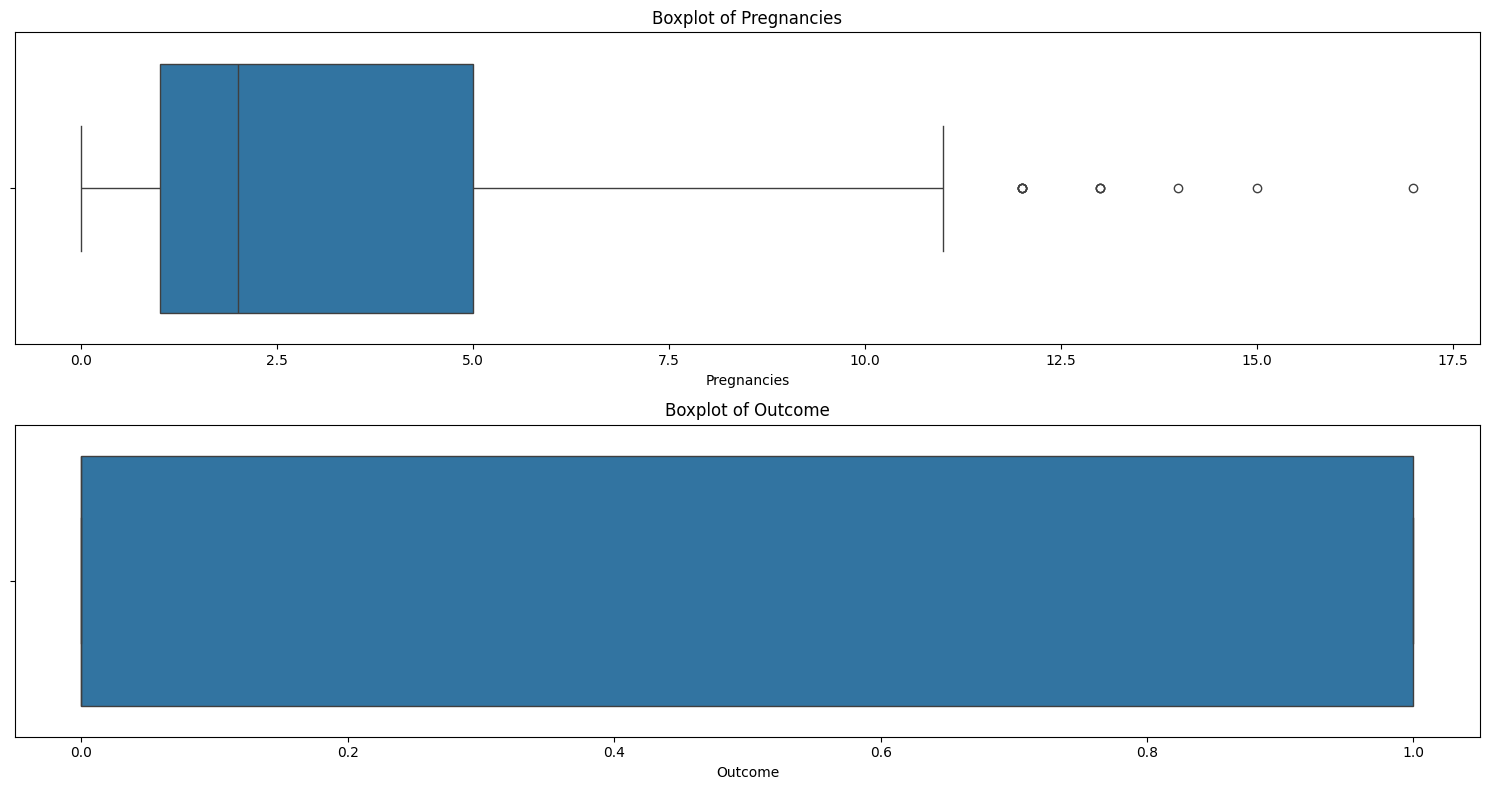

In [15]:
data_cols = ['Pregnancies', 'Outcome']
plt.figure(figsize = (15,8))
for i in range(len(data_cols)):
  plt.subplot(len(data_cols), 1, i + 1)  # i Rows , 1 cols
  sns.boxplot(x = data[data_cols[i]])
  plt.title('Boxplot of {}'.format(data_cols[i]))
  plt.tight_layout()

### 3.6.2 Column Glucose, BloodPressure, and SkinThickness

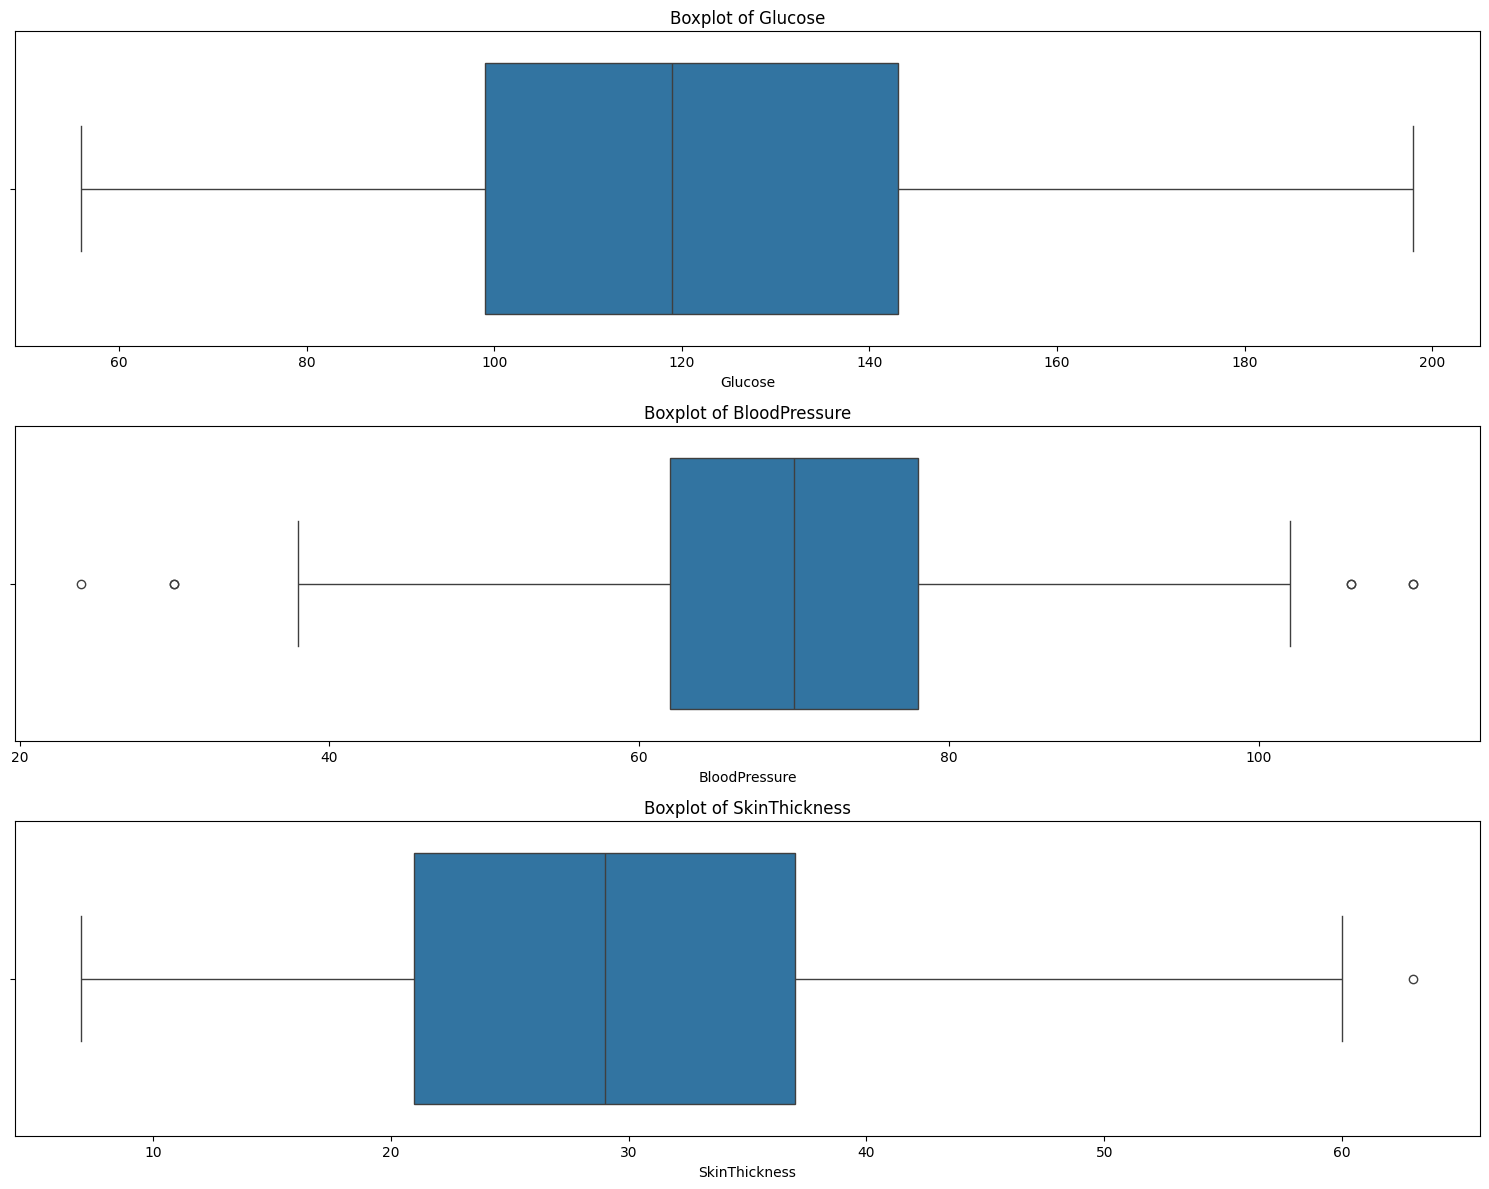

In [16]:
data_cols = ['Glucose',	'BloodPressure', 'SkinThickness']
plt.figure(figsize = (15,12))
for i in range(len(data_cols)):
  plt.subplot(3, 1, i + 1)  # 3 Rows , 1 cols
  sns.boxplot(x = data[data_cols[i]])
  plt.title('Boxplot of {}'.format(data_cols[i]))
  plt.tight_layout()

### 3.6.3 Column Insulin, BMI, DiabetesPedigreeFunction, Age

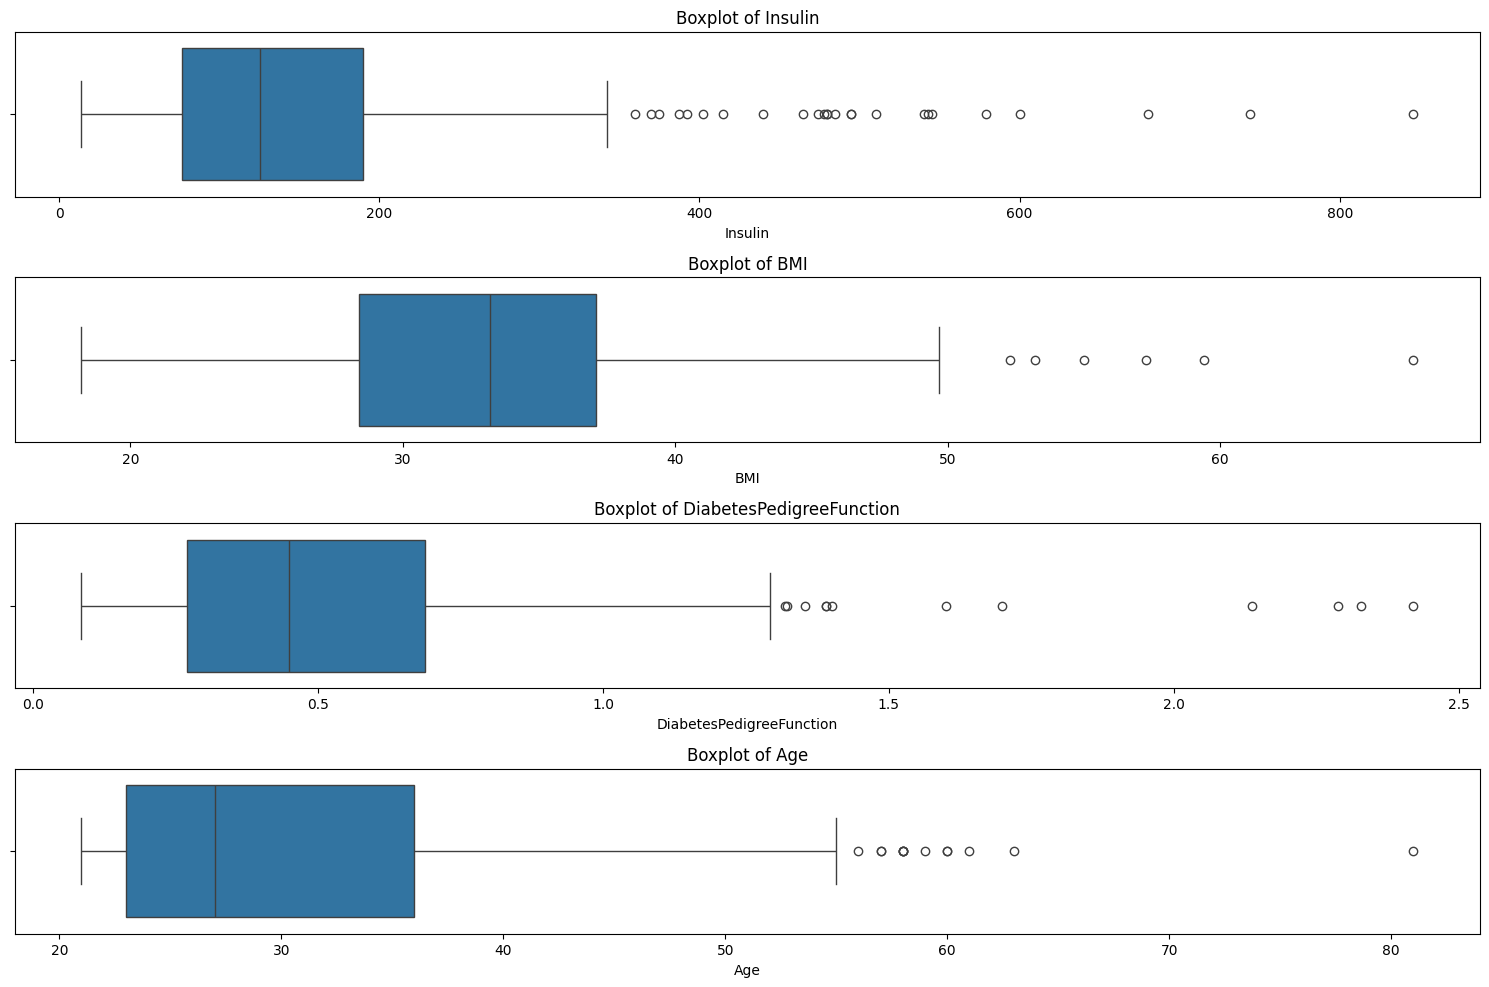

In [17]:
data_cols = ['Insulin',	'BMI', 'DiabetesPedigreeFunction',	'Age']
plt.figure(figsize = (15,12))

for i in range(len(data_cols)):
  plt.subplot(5, 1, i + 1)  # 3 Rows , 1 cols
  sns.boxplot(x = data[data_cols[i]])
  plt.title('Boxplot of {}'.format(data_cols[i]))
  plt.tight_layout()

### 3.6.4 Interpretasi Outlier of Boxplot.



*   Pada boxplot untuk kolom Pregnancies, terlihat adanya outlier pada jumlah kehamilan 13, 15, 16, dan 17. Data tersebut tidak dihapus karena seorang wanita mungkin saja melahirkan hingga 17 anak.
*   Pada boxplot kolom Insulin, kadar insulin menunjukkan fluktuasi yang signifikan, namun fluktuasi tersebut tidak dianggap sebagai outlier.
*   Pada boxplot DiabetesPedigreeFunction, nilai-nilai bervariasi berdasarkan riwayat keluarga, sehingga data tersebut tidak akan dihapus.
*   Pada boxplot kolom Age, meskipun ada nilai yang merupakan outlier, orang dengan usia seperti itu masih mungkin ada, sehingga data tersebut tidak dihapus.



## 3.6 Delete Outlier

Pada interpretasi outlier di boxplot, ditemukan bahwa data tidak dihapus, sehingga langkah ini dapat dilewati.

In [18]:
"""
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
"""

'\nQ1 = data.quantile(0.25)\nQ3 = data.quantile(0.75)\nIQR=Q3-Q1\ndata=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]\n'

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


# 4. Univariate Analysis

Pertama, dataset akan dibagi menjadi dua kategori fitur, yaitu Numerical Features dan Categorical Features.

In [20]:
numerical_features = ['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
categorical_features = ['Pregnancies','Outcome']

##4.1 Categorical Features

###4.1.1 Pregnancies Features

             jumlah sampel  persentase
Pregnancies                           
1                       93        23.7
2                       64        16.3
0                       56        14.3
3                       45        11.5
4                       27         6.9
5                       21         5.4
7                       20         5.1
6                       19         4.8
8                       14         3.6
9                       11         2.8
10                       6         1.5
11                       5         1.3
12                       5         1.3
13                       3         0.8
15                       1         0.3
17                       1         0.3
14                       1         0.3


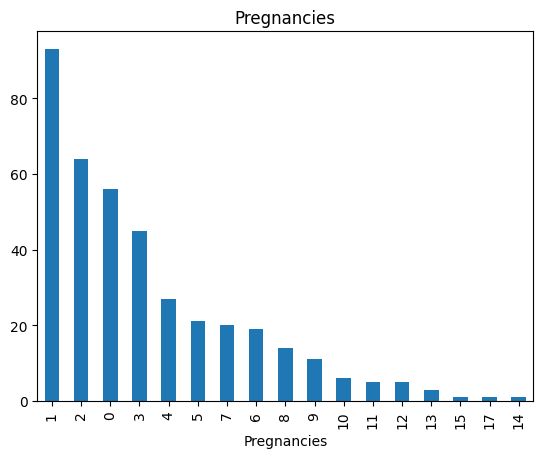

In [21]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Karena tidak ada korelasi yang ditemukan dalam data, maka kolom ini dihapus.

In [22]:
data.drop('Pregnancies', axis=1, inplace=True)

<ipython-input-22-41e731d7051d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Pregnancies', axis=1, inplace=True)


###4.1.2 Outcome Features

         jumlah sampel  persentase
Outcome                           
0                  262        66.8
1                  130        33.2


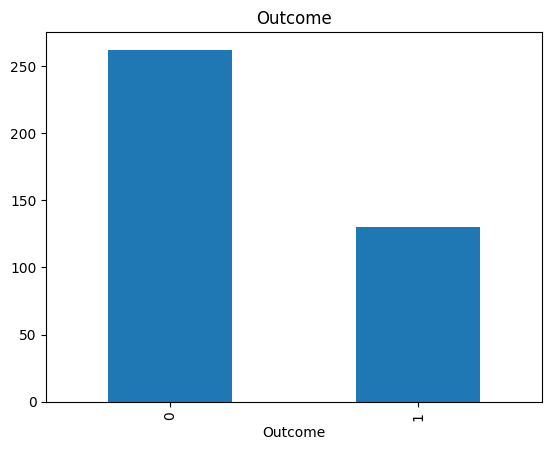

In [23]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

##4.2 Numerical Features

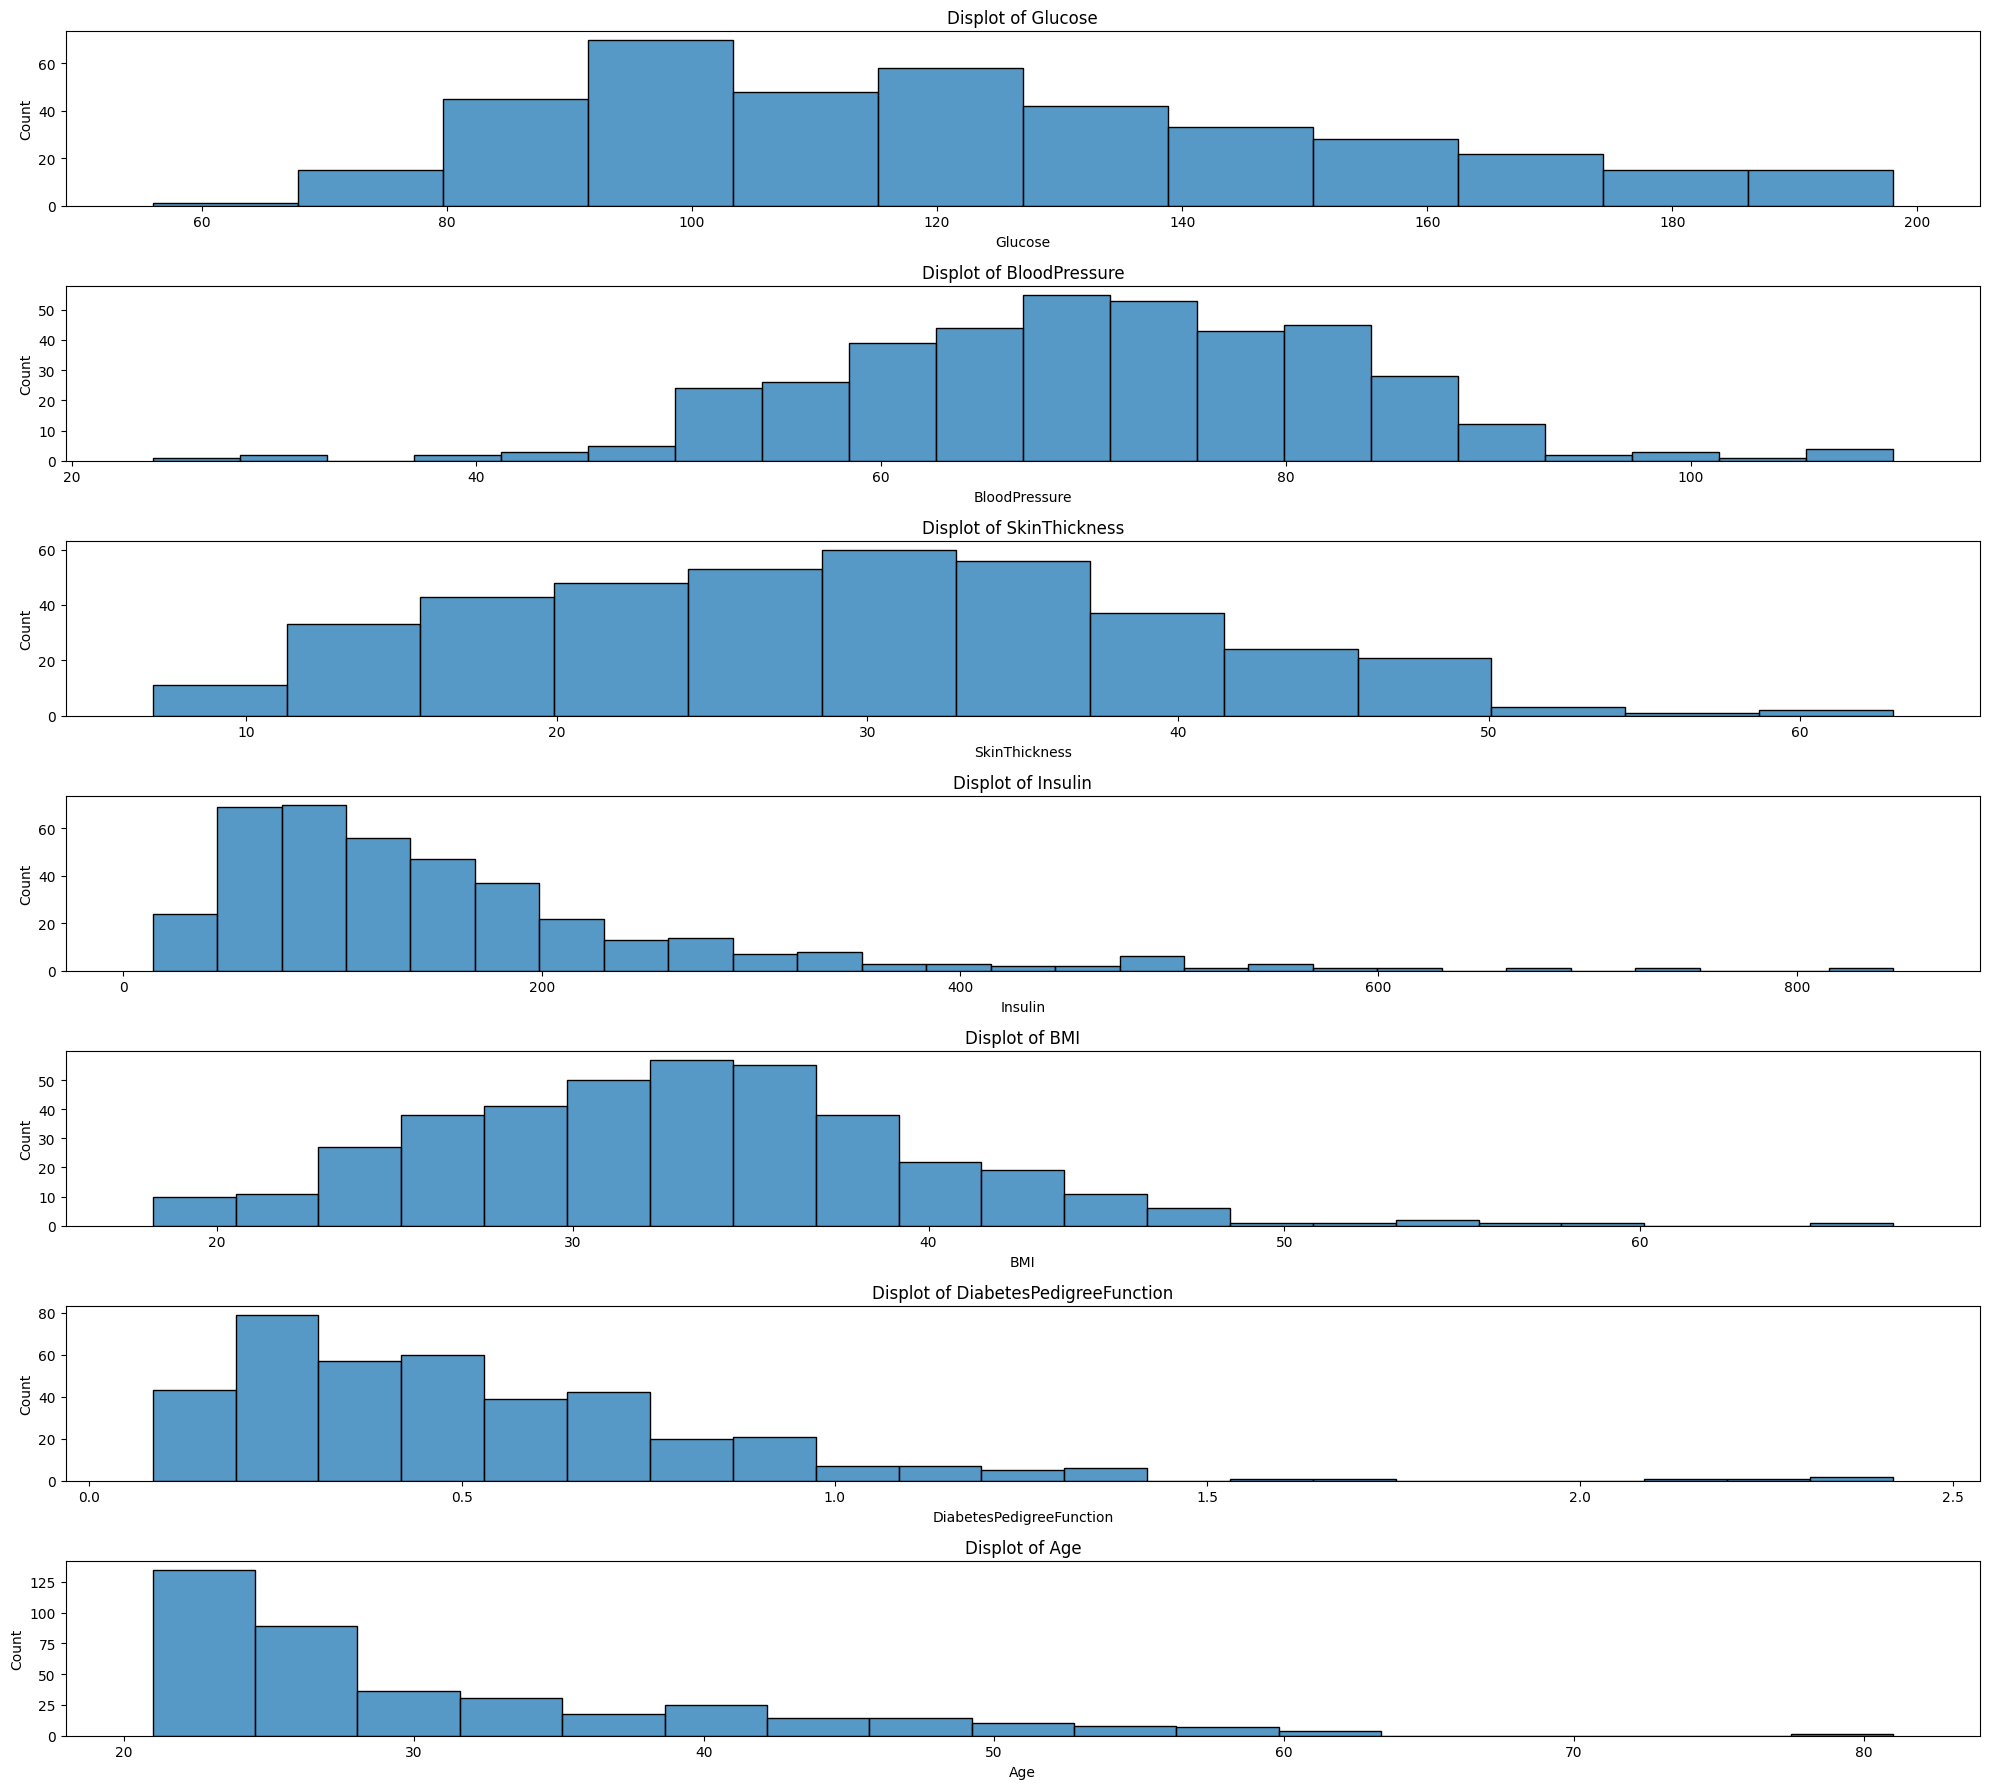

In [24]:
plt.figure(figsize = (20,18))

for i in range(len(numerical_features)):
    plt.subplot(len(numerical_features), 1, i + 1)  # 2 Rows , 2 cols
    sns.histplot(x = data[numerical_features[i]])
    plt.title('Displot of {}'.format(numerical_features[i]))
    plt.tight_layout()

Interpretasi histogram:
*   Beberapa kolom memiliki distribusi yang miring ke kanan.
*   Kolom dengan distribusi normal meliputi Glucose, BloodPressure, SkinThickness, dan BMI.
*   Kolom dengan distribusi miring ke kanan (right-skewed) adalah Insulin, DiabetesPedigreeFunction, dan Age.

#5. Multivariate Analysis

In [25]:
data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
8,197,70,45,543,30.5,0.158,53,1
13,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...
753,181,88,44,510,43.3,0.222,26,1
755,128,88,39,110,36.5,1.057,37,1
760,88,58,26,16,28.4,0.766,22,0
763,101,76,48,180,32.9,0.171,63,0


In [26]:
data.shape

(392, 8)

## 5.1 Seeing the relationship between Numerical Features and the objective function, namely Outcome

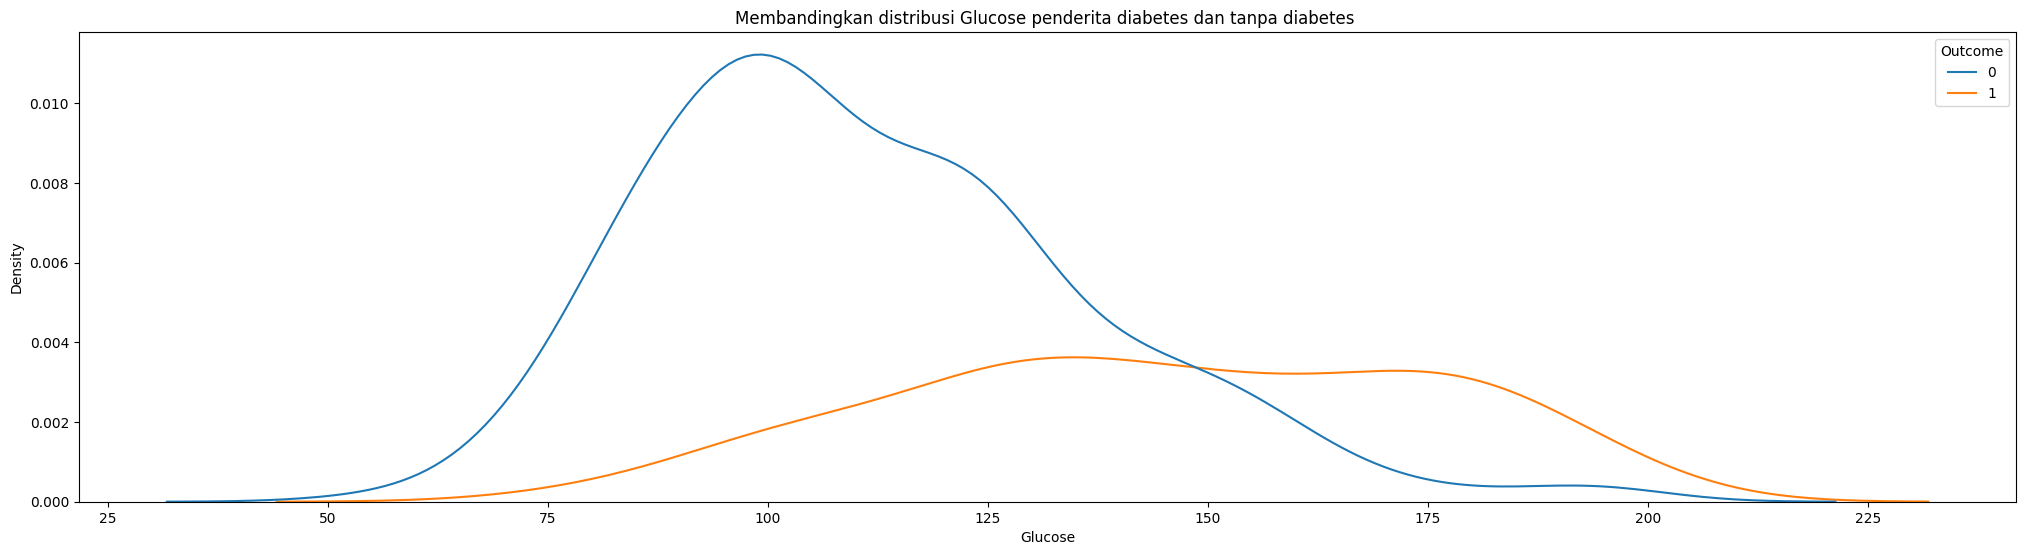

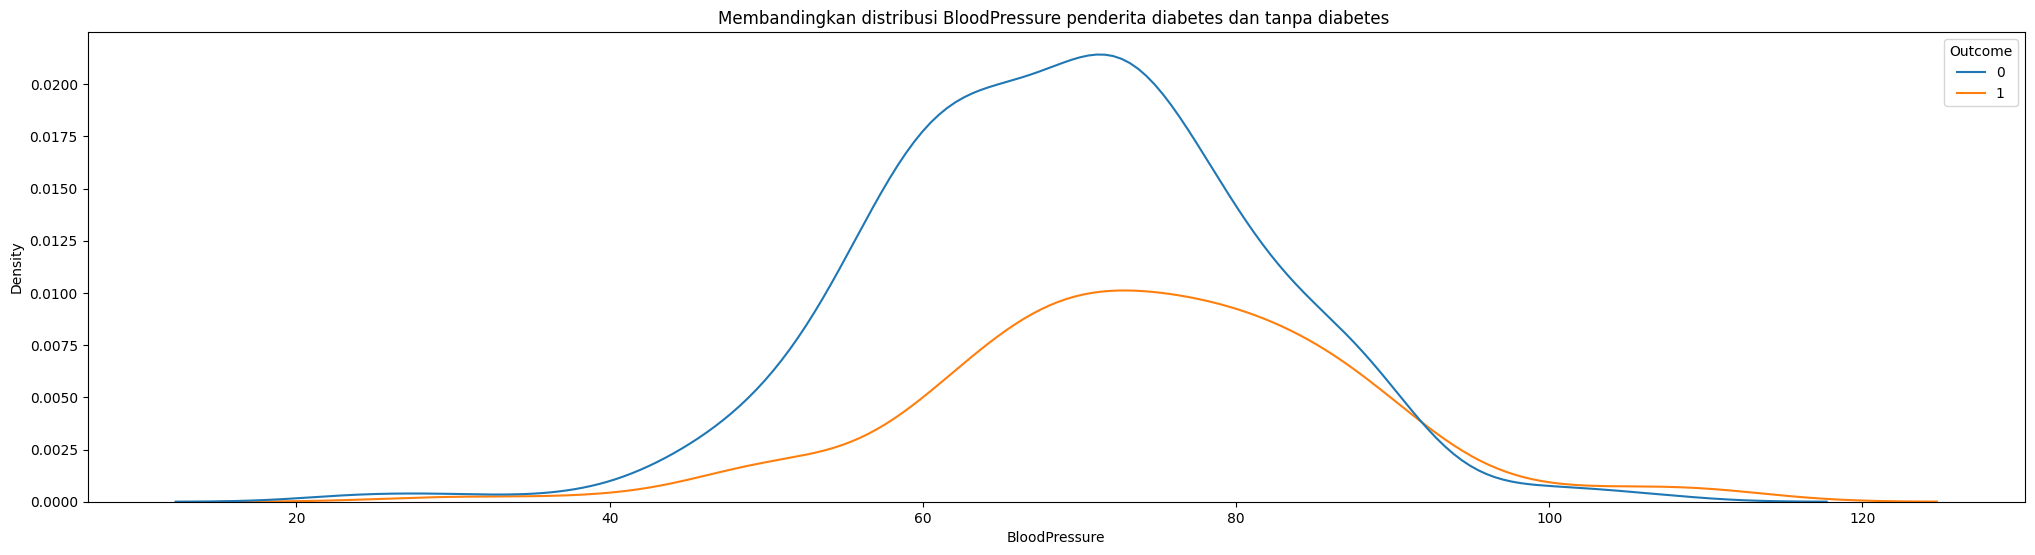

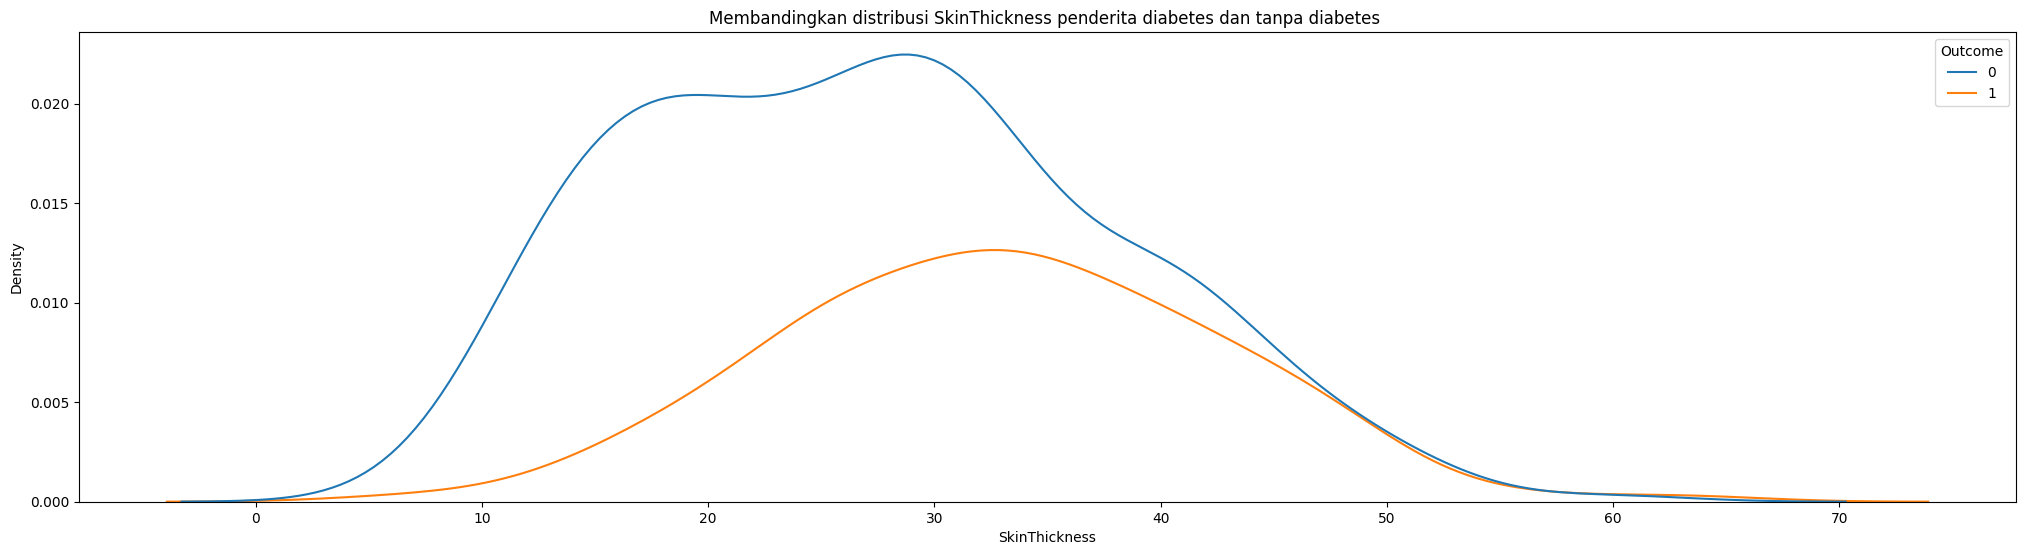

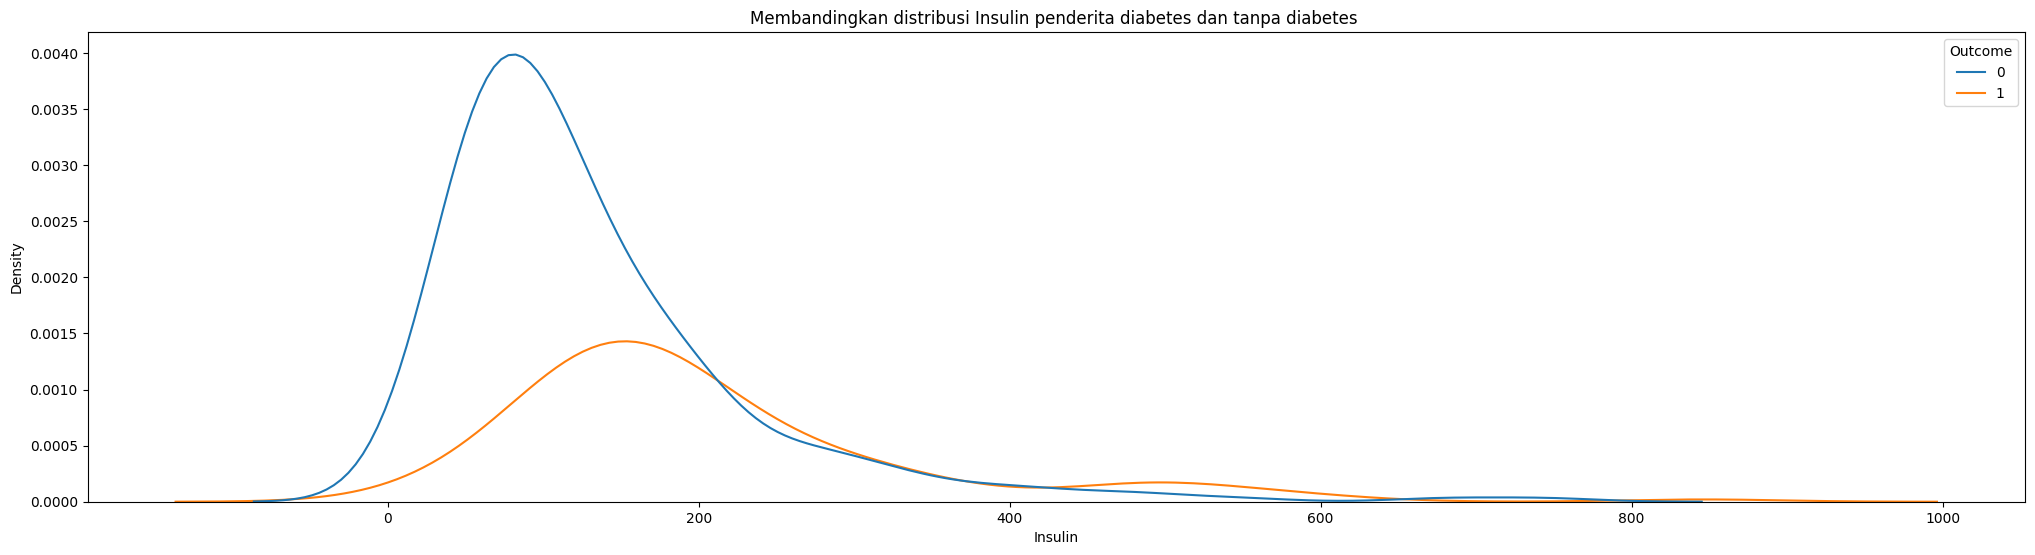

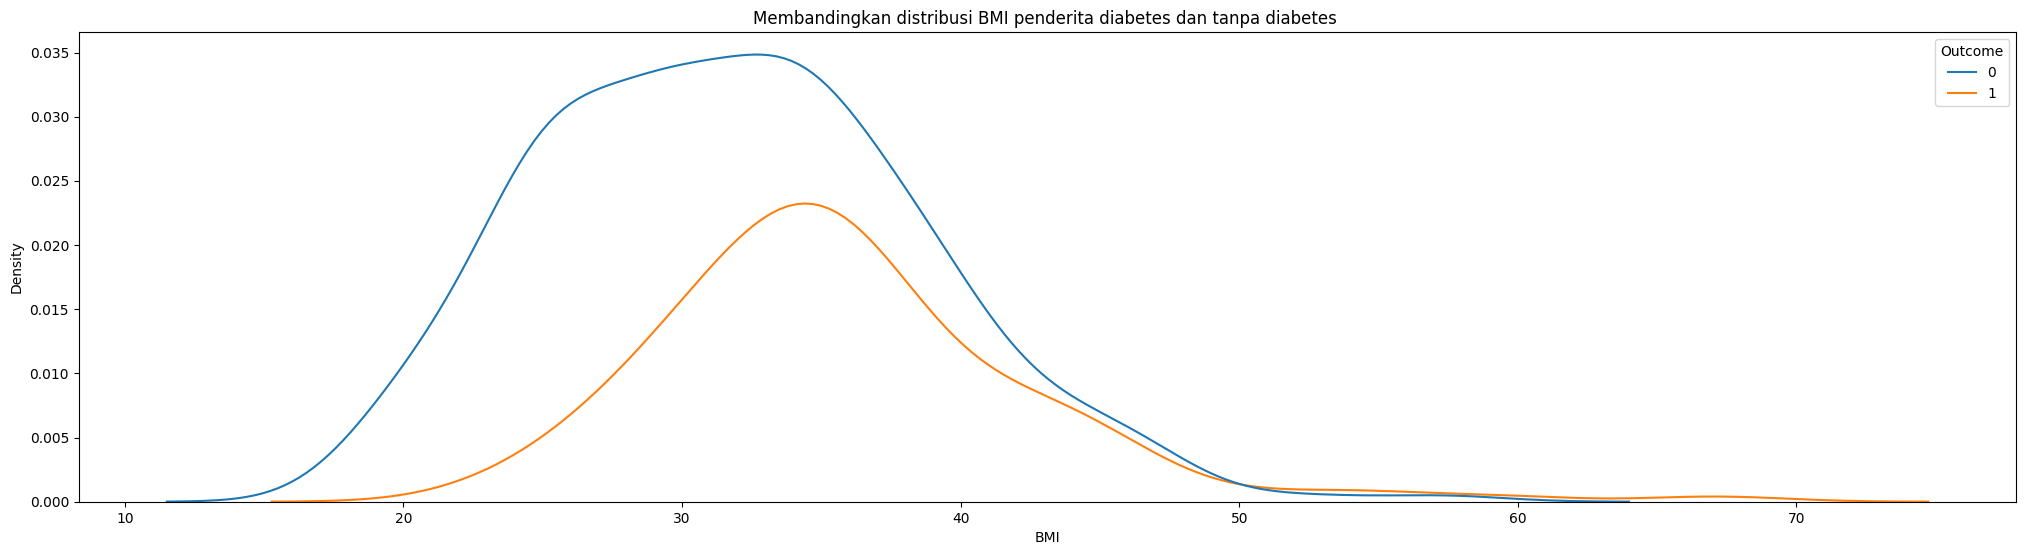

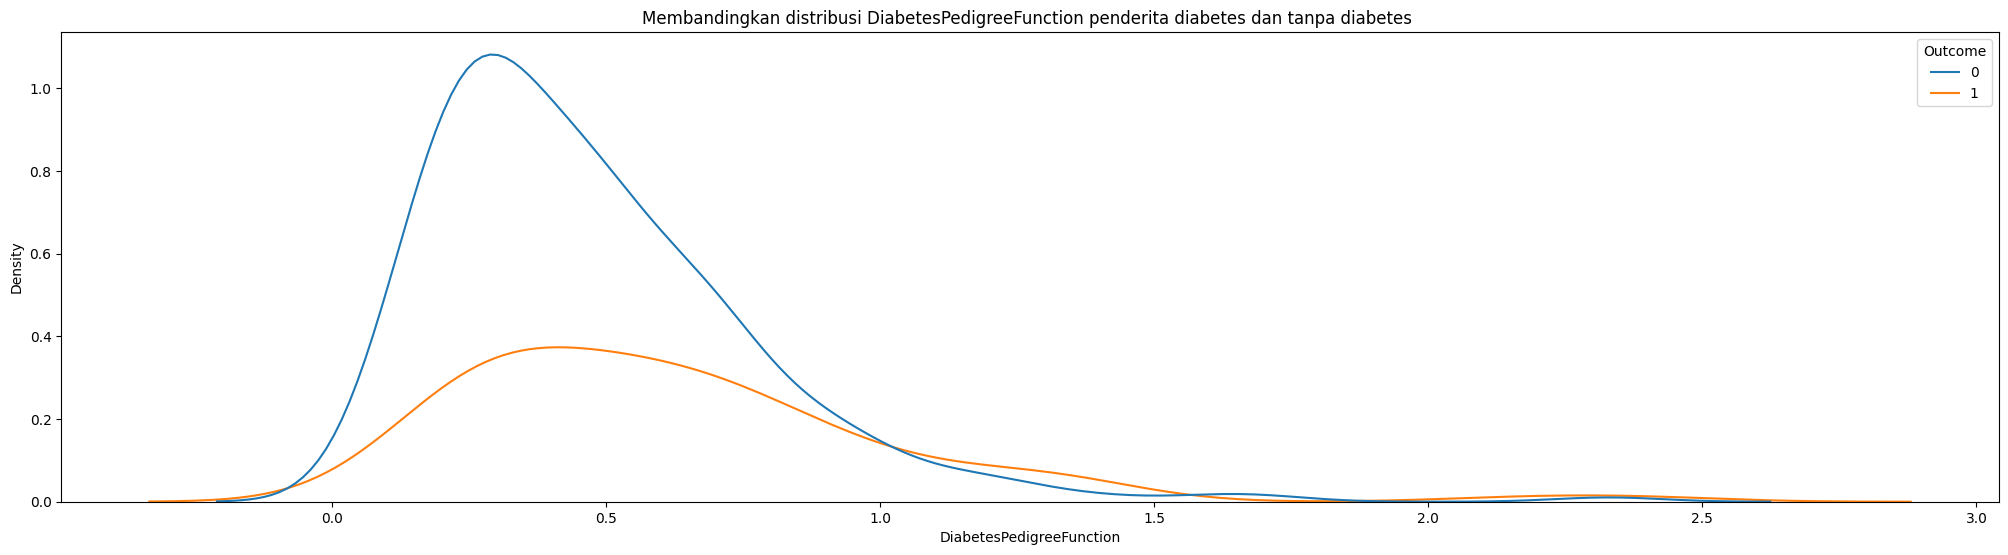

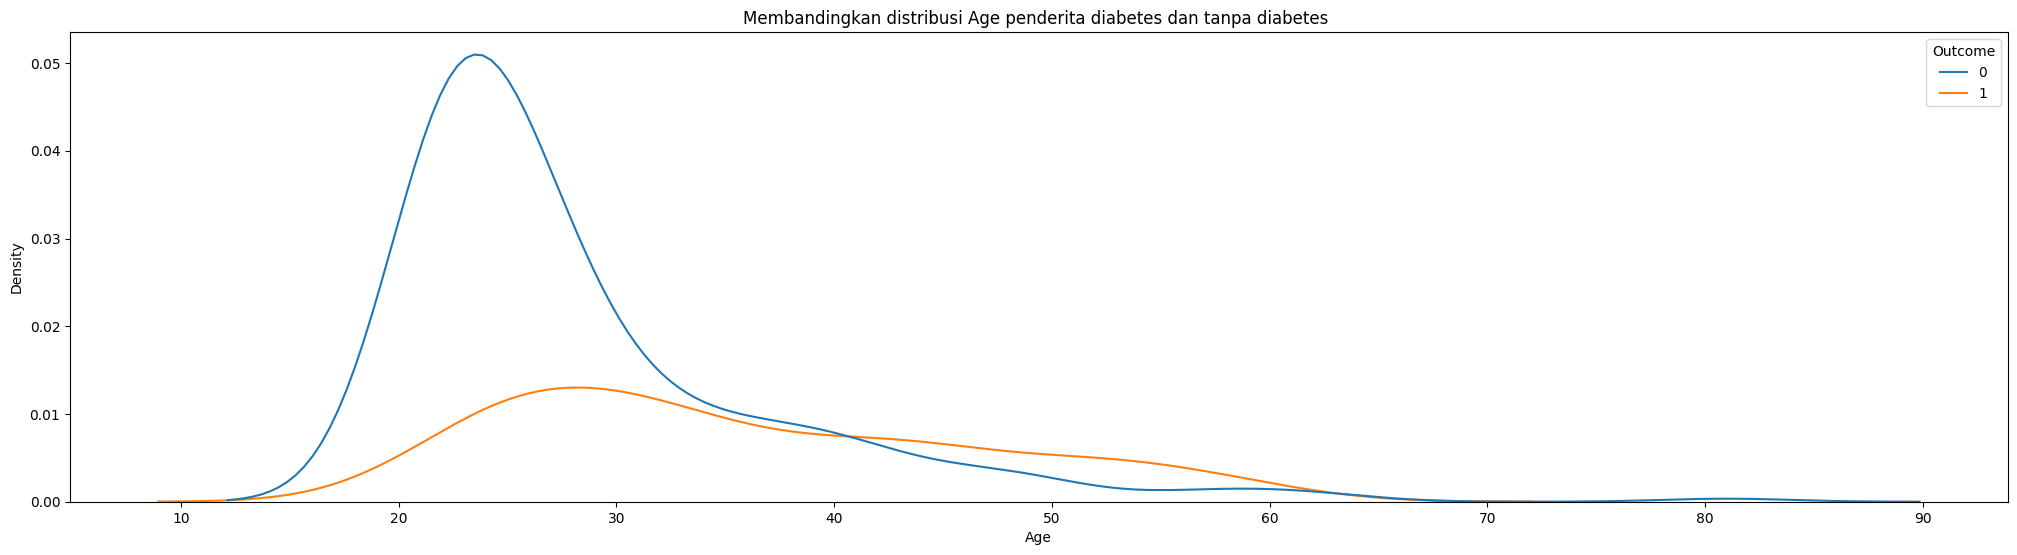

In [27]:
for i in range(len(numerical_features)):
    plt.figure(figsize = (25,50))
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.kdeplot(x=data[numerical_features[i]], hue='Outcome',data=data)
    plt.title('Membandingkan distribusi {} penderita diabetes dan tanpa diabetes '.format(numerical_features[i]))
    plt.show()
    print('\n')

---------------------------
**Interpertasi**
Grafik perbandingan menunjukkan perbedaan antara individu yang terkena diabetes dan yang tidak, khususnya pada kolom Glucose, BloodPressure, BMI, DiabetesPedigreeFunction, dan Age.

--------
**Kesimpulan**
Dari data tersebut, dapat disimpulkan bahwa pasien yang menderita diabetes memiliki ciri-ciri sebagai berikut:
*   Pasien dengan glucose tinggi
*   Pasien dengan BloodPressure tinggi
*   Pasien dengan BMI tinggi
*   Pasien dengan nilai DiabetesPedigreeFunction tinggi
*   Pasien yang memiliki Age lebih tua

##5.2 Heat Map

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

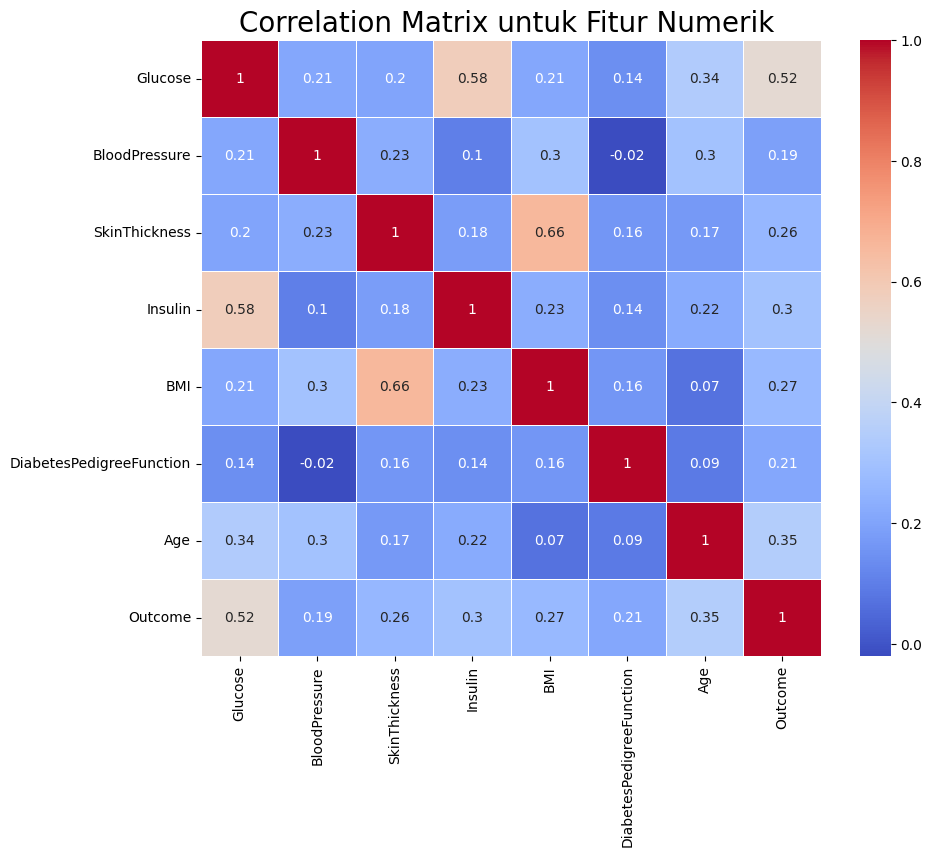

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

-----
**Interpertasi**

Pada hasil heat map dapat dilihat bahwa diabetes berkorelasi dengan glucose, BMI dan age.


#6. Data Preparation

Balancing Dataset

In [29]:
data_majority_0 = data[(data['Outcome']==0)]
data_minority_1 = data[(data['Outcome']==1)]


data_minority_upsampled = sklearn.utils.resample(data_minority_1,
                                 replace=True,
                                 n_samples= 260,
                                 random_state=42)

data = pd.concat([data_minority_upsampled, data_majority_0])

<Axes: xlabel='Outcome', ylabel='count'>

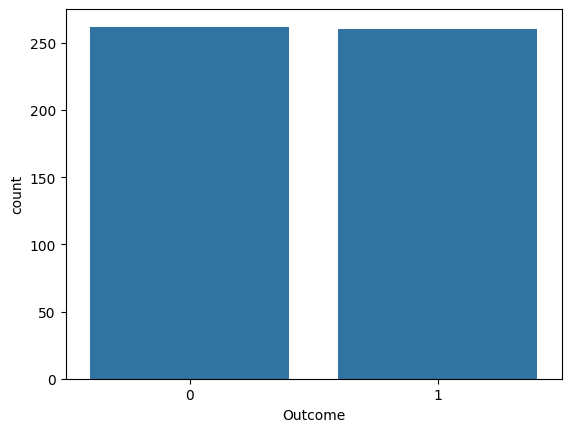

In [30]:
sns.countplot(x=data['Outcome'])

In [31]:
from sklearn.model_selection import train_test_split

X= data.drop(columns="Outcome")
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=100)

# 7. Model Development

## 7.1 K-Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## 7.2 Random Forest

In [33]:
# Import library
from sklearn.ensemble import RandomForestClassifier

# make predictions model
RF = RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=9,random_state=44)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=44)

## 7.3 Boosting Algorithm

In [34]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier()
boosting.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

# 8. Evaluasi Model

In [35]:
# Prepare dataframe for model analysis
models = [knn, RF, boosting]
models_names= ["KNearestNeighbor","Random Forest","Boosting"]
mean_score = []

In [36]:
for model in models:
    cross_score = sklearn.model_selection.cross_val_score(model,X_train,y_train,cv=5)
    average_score = np.mean(cross_score)
    mean_score.append(average_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

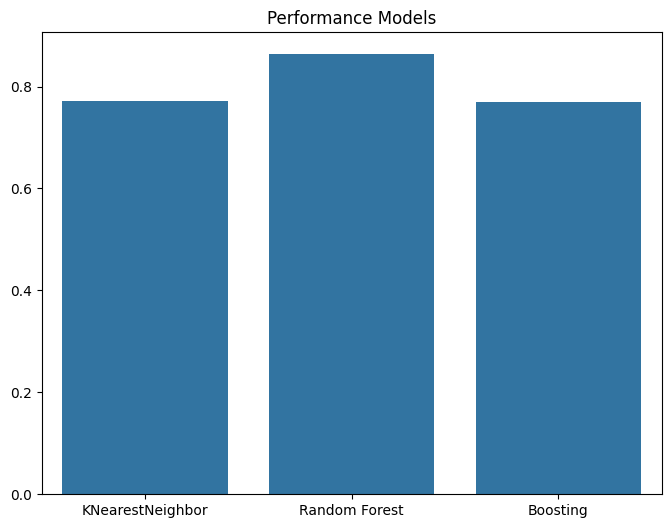

In [38]:
# Diagram Performances Models
plt.figure(figsize=(8,6))
sns.barplot(x=models_names, y=mean_score)
plt.title("Performance Models")
plt.show()

Pada diagram Performance Models, Random Forest menunjukkan kinerja yang sangat baik. Oleh karena itu, kita akan memilih Random Forest untuk digunakan.

In [39]:
print('Train RandomForestClassifierModel  : ' , RF.score(X_train, y_train))
print('Test RandomForestClassifierModel : ' , RF.score(X_test, y_test))

Train RandomForestClassifierModel  :  0.9952038369304557
Test RandomForestClassifierModel :  0.9238095238095239


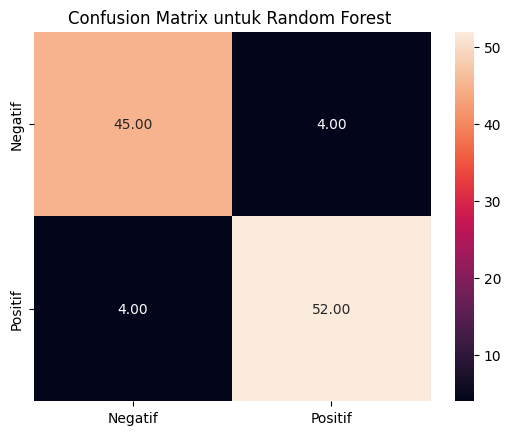

In [41]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
RF = sklearn.metrics.confusion_matrix(y_test,y_pred_RF)

ax=sns.heatmap(RF,annot=True,fmt=".2f")
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Confusion Matrix untuk Random Forest ")
plt.show()

In [42]:
RF_test_score = sklearn.metrics.accuracy_score(y_test,y_pred_RF)
print("Akurasi Random Forest Classifier : {}".format(RF_test_score))

print("-" * 100)

RF_precision_score = sklearn.metrics.precision_score(y_test,y_pred_RF)
print("Precision Random Forest Classifier : {}".format(RF_precision_score))

print("-" * 100)

RF_recall_score = sklearn.metrics.recall_score(y_test,y_pred_RF)
print("Recall Random Forest Classifier : {}".format(RF_recall_score))

print("-" * 100)

f1_score = sklearn.metrics.f1_score(y_test,y_pred_RF)
print("F1 score Random Forest Classifier : {}".format(f1_score))

Akurasi Random Forest Classifier : 0.9238095238095239
----------------------------------------------------------------------------------------------------
Precision Random Forest Classifier : 0.9285714285714286
----------------------------------------------------------------------------------------------------
Recall Random Forest Classifier : 0.9285714285714286
----------------------------------------------------------------------------------------------------
F1 score Random Forest Classifier : 0.9285714285714286
